In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import lazypredict
import matplotlib.pyplot as plt
import numpy as np

train_df=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s3e25/train.csv")
test_df=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s3e25/test.csv")

In [2]:
pd.set_option('display.max_columns',None)
train_df

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10402,10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8
10405,10405,38.0,1.553160,12.666667,4.666667,26.621687,11.290033,2.743333,1.756667,0.980000,0.486507,0.77755,6.0


In [3]:
train_df.describe(include='all')

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


Possible outliers: allelectrons_Total, density_Total, allelectrons_Average, atomicweight_Average, density_Average

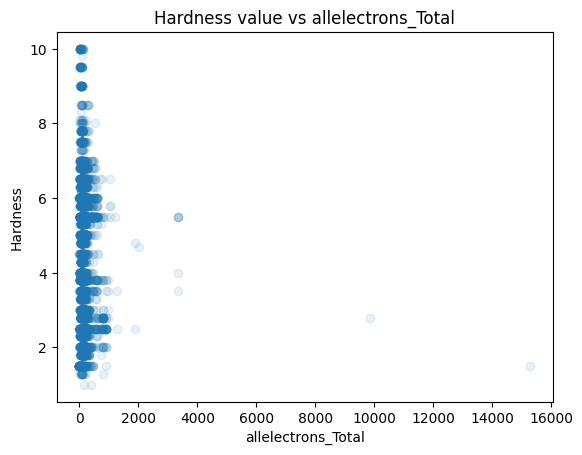

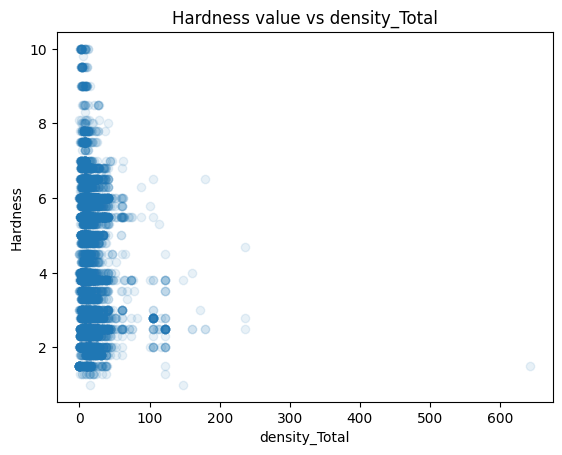

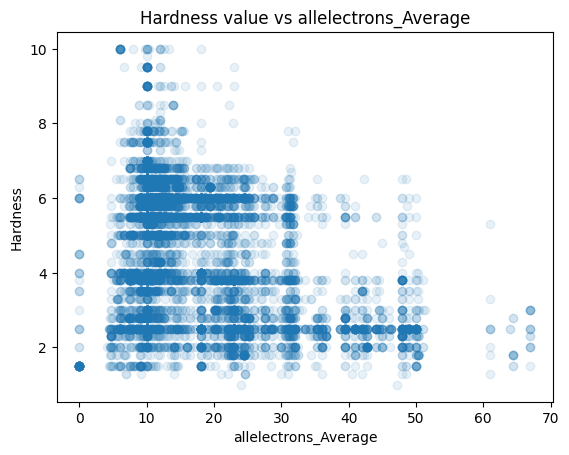

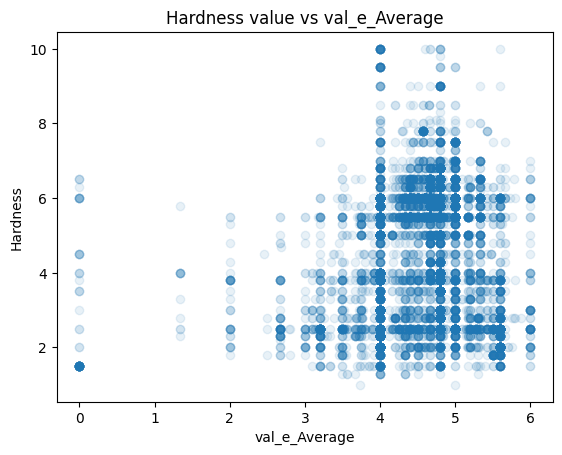

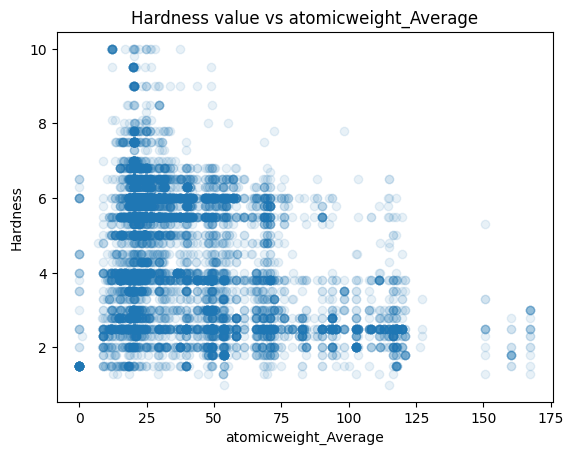

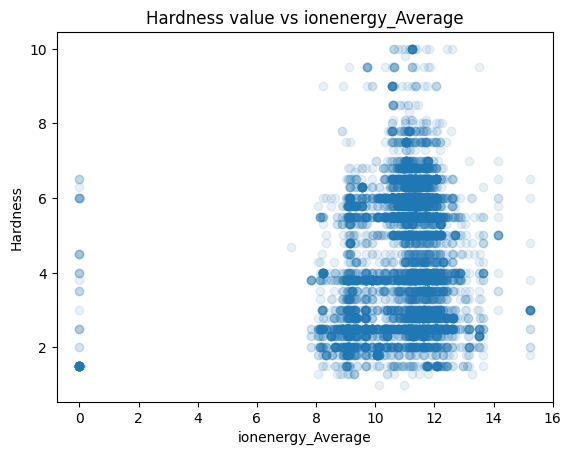

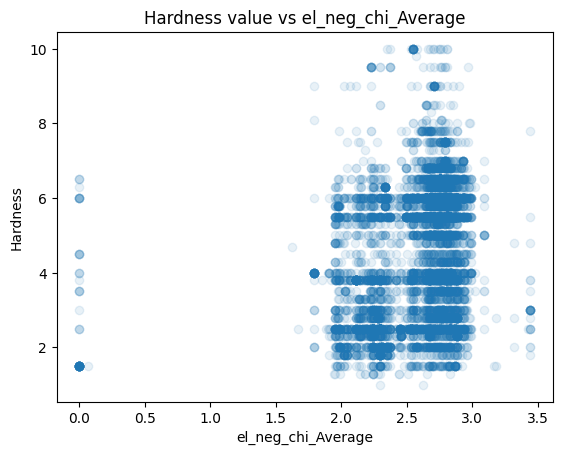

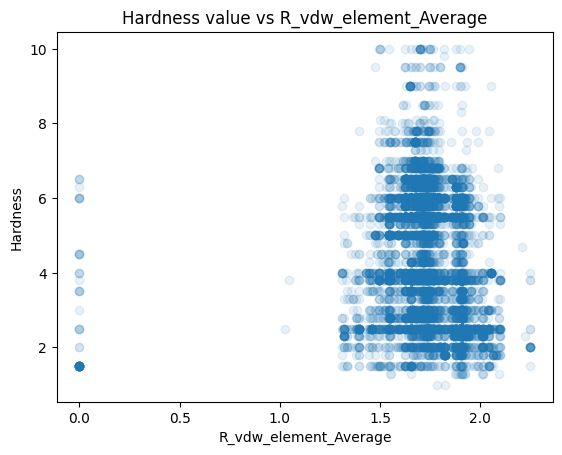

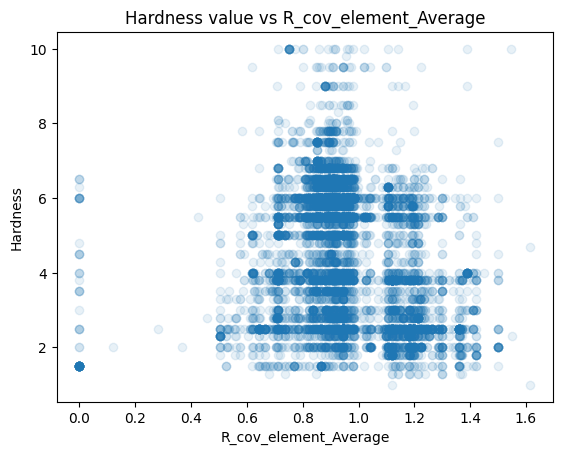

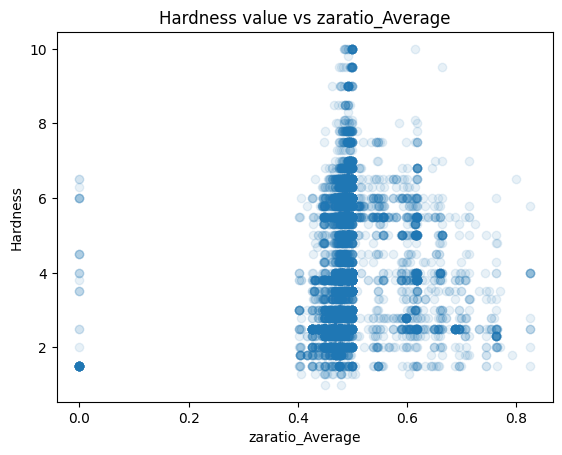

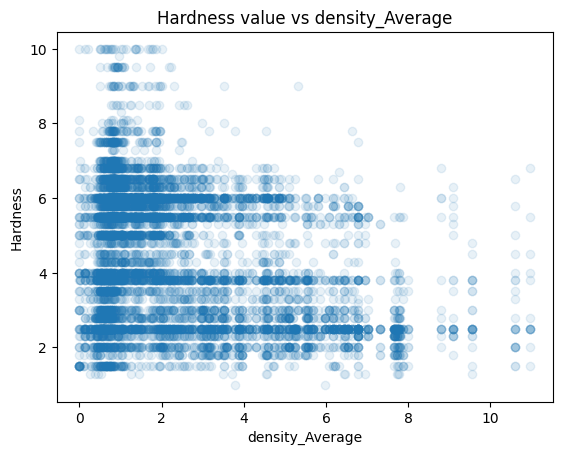

In [4]:
features=train_df.columns.tolist()
features.remove('Hardness')
features.remove('id')

for feature in features:
    plt.scatter(x=feature,y='Hardness',data=train_df,alpha=.1)
    plt.xlabel(feature)
    plt.ylabel('Hardness')
    plt.title(f'Hardness value vs {feature}')
    plt.show()

In [5]:
filter=train_df[train_df['allelectrons_Total']>1600].index
train_df.drop(filter,inplace=True)

In [6]:
filter=train_df[train_df['density_Total']>150].index
train_df.drop(filter,inplace=True)

In [7]:
filter=train_df[train_df['allelectrons_Average']>55].index
train_df.drop(filter,inplace=True)

In [8]:
filter=train_df[train_df['allelectrons_Average']<1].index
train_df.drop(filter,inplace=True)

In [9]:
filter=train_df[train_df['val_e_Average']<2.5].index
train_df.drop(filter,inplace=True)

In [10]:
filter=train_df[train_df['atomicweight_Average']>150].index
train_df.drop(filter,inplace=True)

In [11]:
filter=train_df[train_df['ionenergy_Average']<1].index
train_df.drop(filter,inplace=True)

In [12]:
filter=train_df[train_df['ionenergy_Average']>14].index
train_df.drop(filter,inplace=True)

In [13]:
filter=train_df[train_df['el_neg_chi_Average']<1.8].index
train_df.drop(filter,inplace=True)

In [14]:
filter=train_df[train_df['el_neg_chi_Average']>3].index
train_df.drop(filter,inplace=True)

In [15]:
filter=train_df[train_df['R_vdw_element_Average']<1].index
train_df.drop(filter,inplace=True)

In [16]:
filter=train_df[train_df['R_vdw_element_Average']>2.4].index
train_df.drop(filter,inplace=True)

In [17]:
filter=train_df[train_df['R_cov_element_Average']<0.4].index
train_df.drop(filter,inplace=True)

In [18]:
filter=train_df[train_df['R_cov_element_Average']>1.5].index
train_df.drop(filter,inplace=True)

In [19]:
filter=train_df[train_df['zaratio_Average']<0.4].index
train_df.drop(filter,inplace=True)

In [20]:
filter=train_df[train_df['zaratio_Average']>0.77].index
train_df.drop(filter,inplace=True)

In [21]:
filter=train_df[train_df['density_Average']>8].index
train_df.drop(filter,inplace=True)

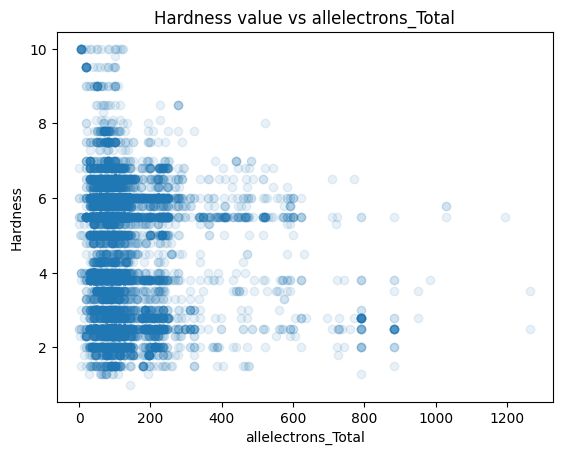

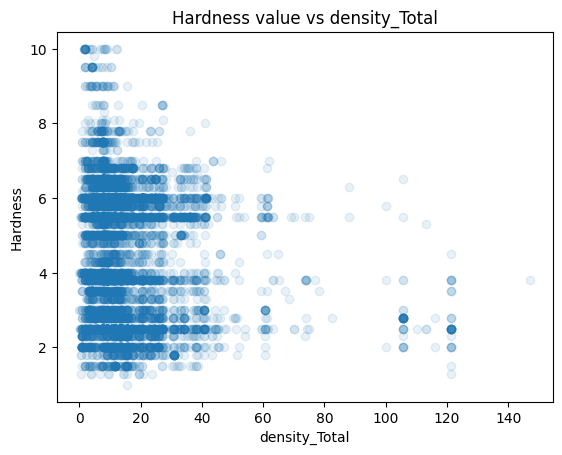

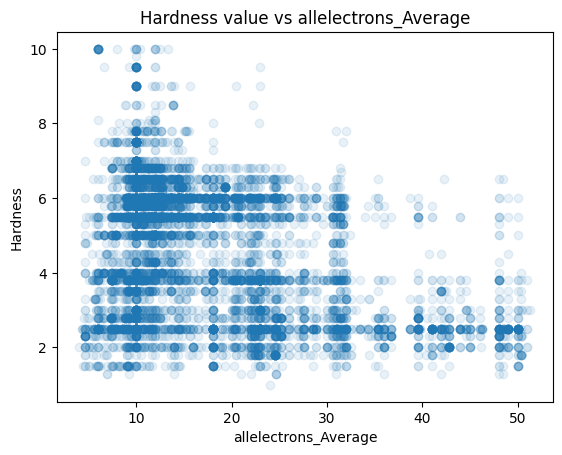

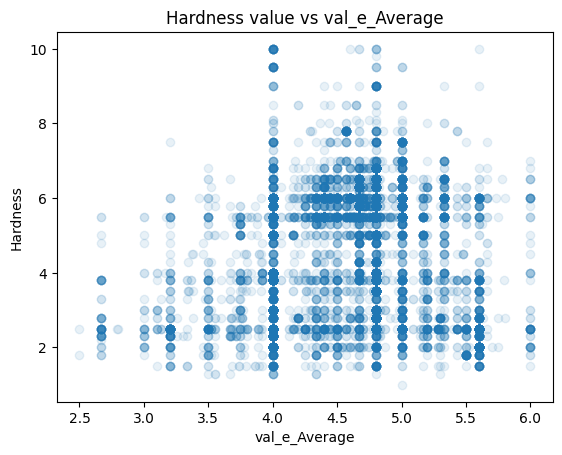

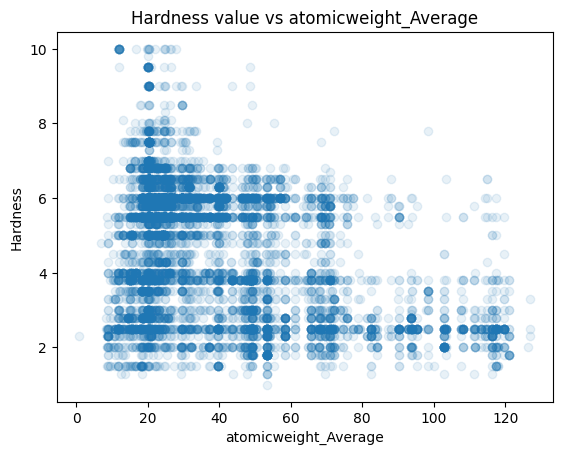

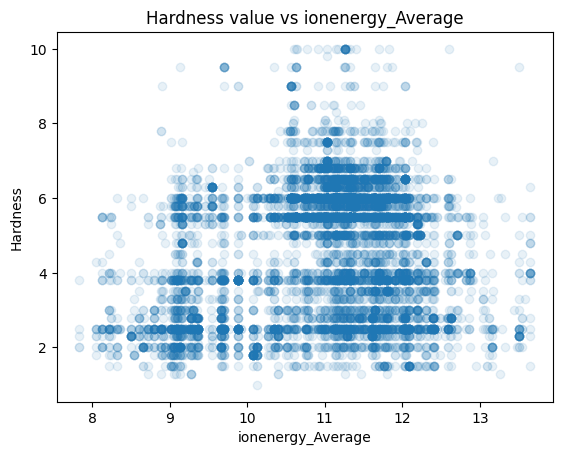

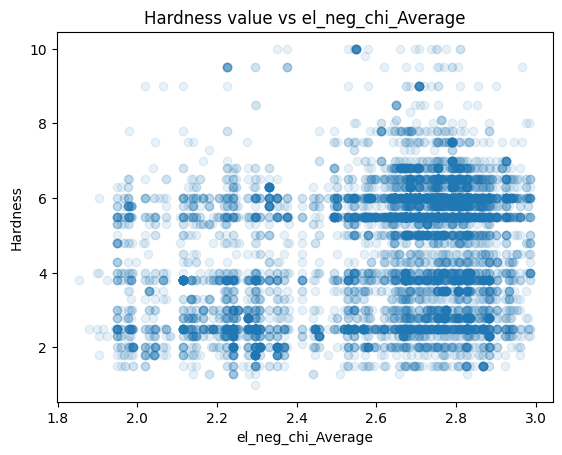

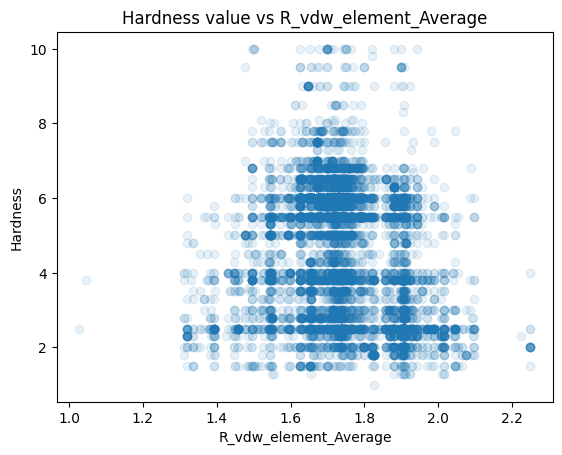

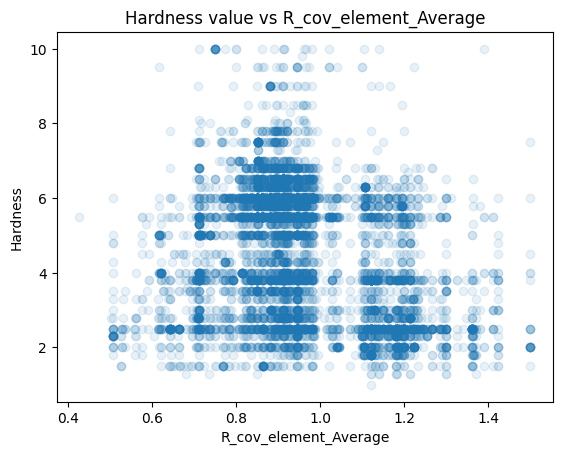

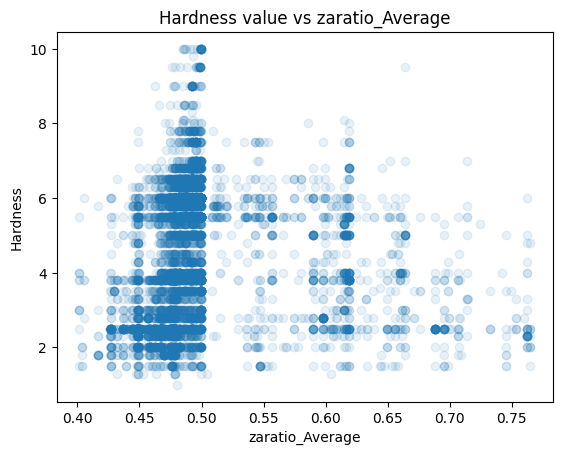

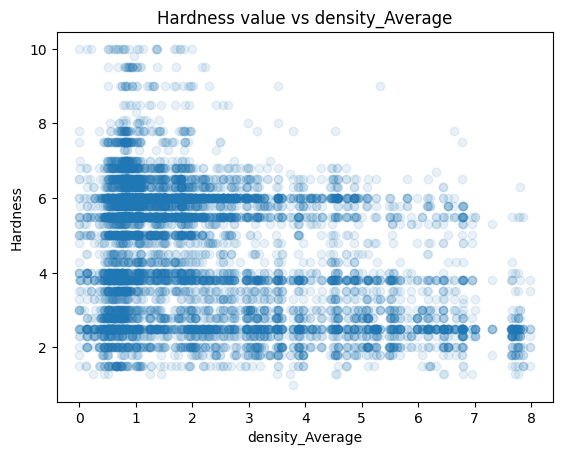

In [22]:
for feature in features:
    plt.scatter(x=feature,y='Hardness',data=train_df,alpha=.1)
    plt.xlabel(feature)
    plt.ylabel('Hardness')
    plt.title(f'Hardness value vs {feature}')
    plt.show()

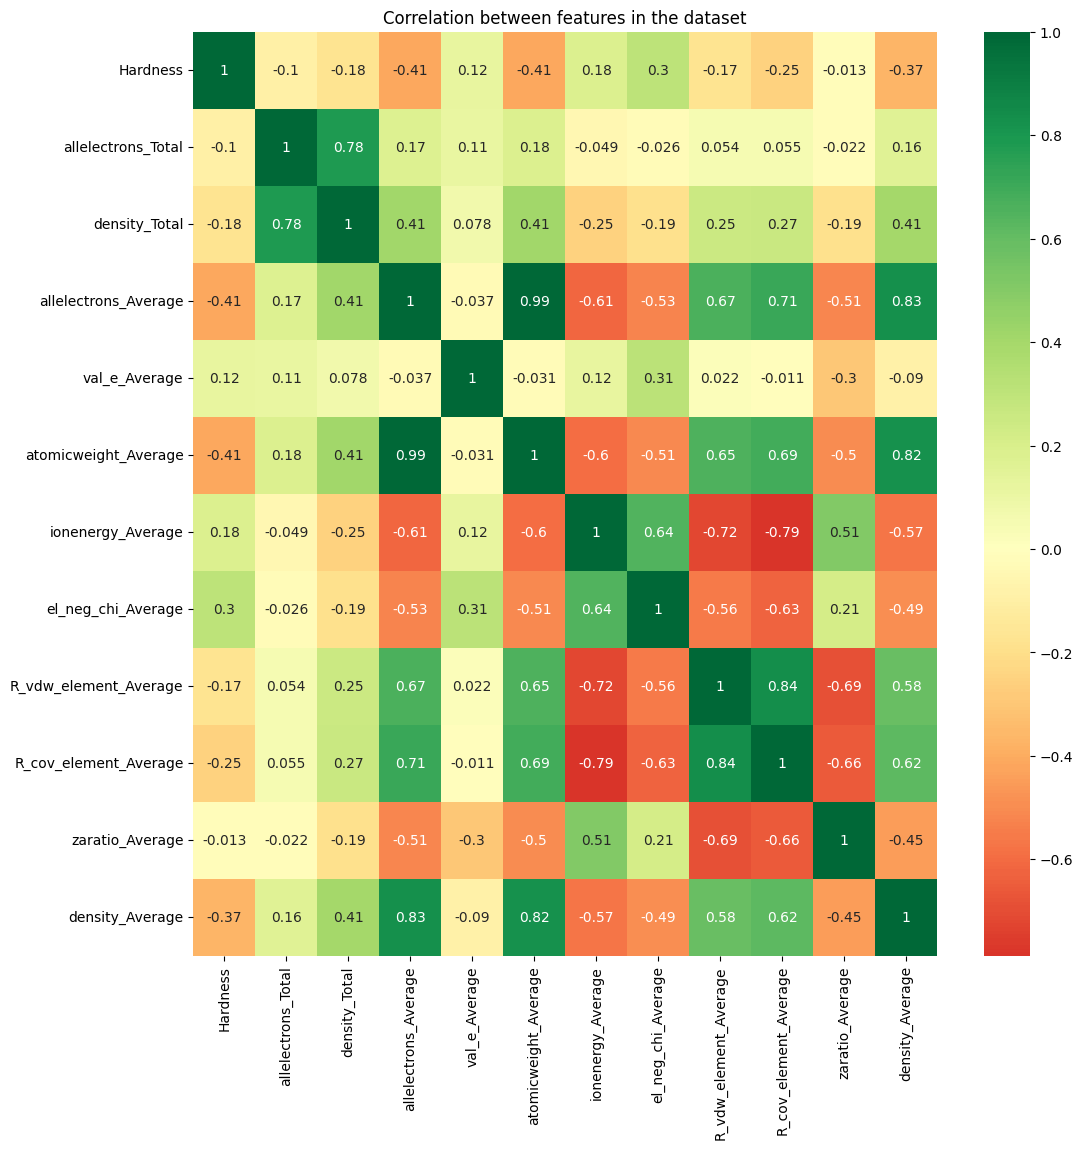

In [23]:
plt.figure(figsize=(12,12))
ax=sns.heatmap(train_df[['Hardness']+features].corr(),
    xticklabels=train_df[['Hardness']+features].corr().columns,
    yticklabels=train_df[['Hardness']+features].corr().columns,
    cmap='RdYlGn',
    center=0,
    annot=True)

plt.title('Correlation between features in the dataset',fontsize=12)
plt.show()

In [24]:
train_df.drop(columns=['R_cov_element_Average','allelectrons_Total','ionenergy_Average','allelectrons_Average','atomicweight_Average'],inplace=True)

In [25]:
test_df.drop(columns=['R_cov_element_Average','allelectrons_Total','ionenergy_Average','allelectrons_Average','atomicweight_Average'],inplace=True)

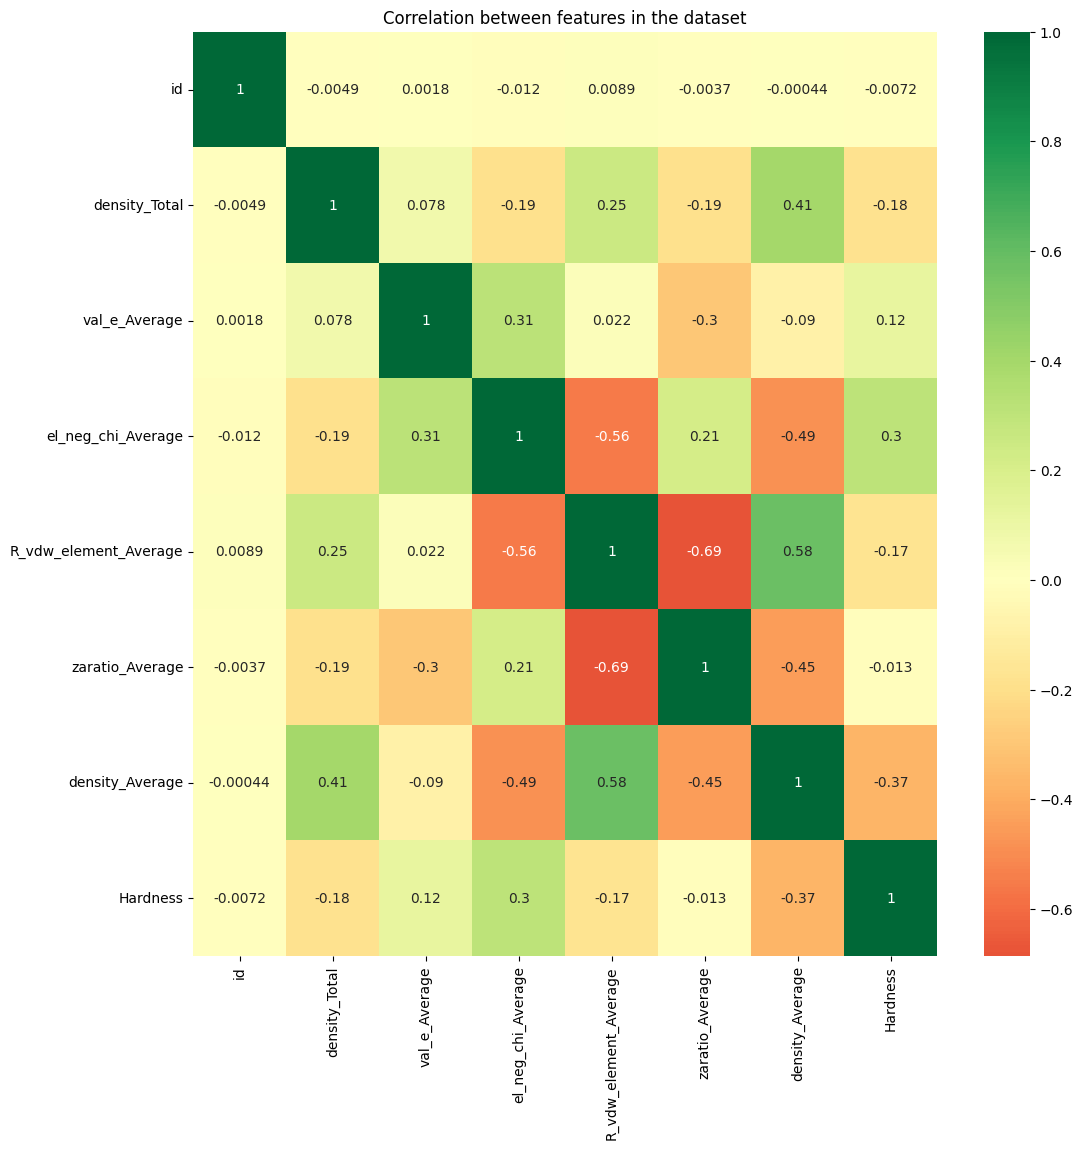

In [26]:
plt.figure(figsize=(12,12))
ax=sns.heatmap(train_df.corr(),
    xticklabels=train_df.corr().columns,
    yticklabels=train_df.corr().columns,
    cmap='RdYlGn',
    center=0,
    annot=True)

plt.title('Correlation between features in the dataset',fontsize=12)
plt.show()

In [27]:
train_df.describe(include='all')

,id,density_Total,val_e_Average,el_neg_chi_Average,R_vdw_element_Average,zaratio_Average,density_Average,Hardness
count,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000
mean,5197.449320,14.316073,4.594467,2.632711,1.739053,0.496575,2.053614,4.703802
std,3002.551619,13.636157,0.540157,0.245182,0.126471,0.048358,1.762139,1.662858
min,0.000000,0.001000,2.500000,1.855000,1.028000,0.401635,0.000000,1.000000
25%,2598.750000,7.558488,4.200000,2.545000,1.672500,0.477015,0.817390,3.000000
50%,5194.500000,10.650000,4.761905,2.708000,1.732000,0.489272,1.351300,5.500000
75%,7795.250000,16.630000,4.800000,2.805000,1.794016,0.496167,2.677200,6.000000
max,10406.000000,147.252000,6.000000,2.986667,2.250000,0.765010,7.986670,10.000000


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

X=train_df.drop(['Hardness','id'],axis=1)
y=train_df[["Hardness"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

random_forest_reg=RandomForestRegressor()
scaler=StandardScaler()
pipeline=Pipeline(steps=[("scaler",scaler),("random_forest_reg",random_forest_reg)])
rfc={'random_forest_reg__n_estimators':[100],'random_forest_reg__min_samples_split':[2,3,4,5],'random_forest_reg__bootstrap': [True, False]}
parameter_search=GridSearchCV(pipeline,param_grid=rfc,scoring='neg_mean_squared_error')
parameter_search.fit(X_train, y_train)
print("The best parameters are:", parameter_search.best_params_)
model=parameter_search.best_estimator_
y_predict_test=model.predict(X_test)
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test,y_predict_test))}')

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed

The best parameters are: {'random_forest_reg__bootstrap': True, 'random_forest_reg__min_samples_split': 5, 'random_forest_reg__n_estimators': 100}
Test RMSE: 1.2894085107731093


In [29]:
y_predict_train=model.predict(X_train)

In [30]:
print(np.sqrt(mean_squared_error(y_train,y_predict_train)))

0.5990022713038824


In [32]:
test=test_df.drop(['id'],axis=1)

y_pred=model.predict(test)

In [33]:
submission = pd.DataFrame({"id": test_df['id'],"Hardness":y_pred})

submission.to_csv('C:/Users/pfali/Downloads/playground-series-s3e25/submission.csv', index=False)